In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
import csv 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split


In [3]:
data=pd.read_csv('data/medical_students_dataset.csv')

In [4]:
data.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [5]:
data.shape

(200000, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [7]:
data.duplicated().sum()

7644

data cleaning

In [8]:
data.isna().sum().sort_values(ascending=False)

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [9]:
missing_percentages = data.isna().sum().sort_values(ascending=False)*100 / len(data)
missing_percentages

Student ID        10.0
Age               10.0
Gender            10.0
Height            10.0
Weight            10.0
Blood Type        10.0
BMI               10.0
Temperature       10.0
Heart Rate        10.0
Blood Pressure    10.0
Cholesterol       10.0
Diabetes          10.0
Smoking           10.0
dtype: float64

<AxesSubplot: >

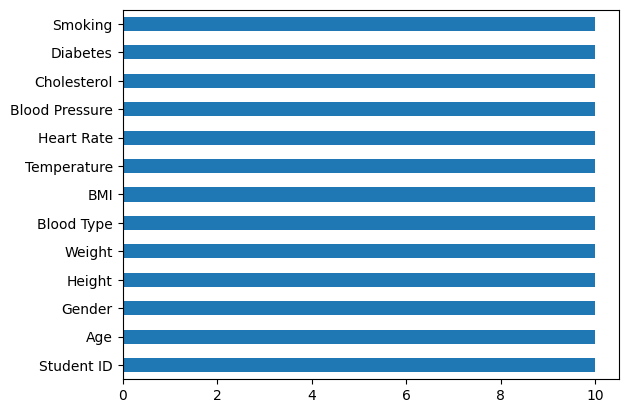

In [10]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Filling missing numerical features

In [11]:
data['Student ID'] = np.arange(1, len(data) + 1, dtype='float64')

In [12]:
numerical_features = data.describe().columns[1:].drop('BMI')
numerical_features

Index(['Age', 'Height', 'Weight', 'Temperature', 'Heart Rate',
       'Blood Pressure', 'Cholesterol'],
      dtype='object')

In [13]:

for col in numerical_features:
    data[col] = data[col].fillna(data[col].median())


In [14]:
#remplacer les valeurs null de bmi
data['BMI'] = (data['Weight'] / pow(data['Height'], 2)) * 10000

In [15]:
data.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,98.599654,95.0,109.0,203.0,No,NaN
1,2.0,26.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,4.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,174.899914,46.234173,O,15.114156,98.480008,95.0,115.0,231.0,No,No


In [16]:
data['BMI'].isna().sum()

0

In [17]:
data.isna().sum()

Student ID            0
Age                   0
Gender            20000
Height                0
Weight                0
Blood Type        20000
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes          20000
Smoking           20000
dtype: int64

In [18]:
data['Height'] = data['Height'].replace(np.NaN, data['Height'].mean())
data['Weight'] = data['Weight'].replace(np.NaN, data['Weight'].mean())
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [19]:
data.isna().sum()

Student ID            0
Age                   0
Gender                0
Height                0
Weight                0
Blood Type        20000
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes          20000
Smoking           20000
dtype: int64

In [20]:
data['Temperature'] = data['Temperature'].replace(np.NaN, data['Temperature'].mean())
data['Heart Rate'] = data['Heart Rate'].replace(np.NaN, data['Heart Rate'].mean())
data['Blood Pressure'] = data['Blood Pressure'].replace(np.NaN, data['Blood Pressure'].mean())
data['Cholesterol'] = data['Cholesterol'].replace(np.NaN, data['Cholesterol'].mean())

In [21]:
data.isna().sum()

Student ID            0
Age                   0
Gender                0
Height                0
Weight                0
Blood Type        20000
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes          20000
Smoking           20000
dtype: int64

In [22]:
data.isnull().sum() * 100 / len(data)

Student ID         0.0
Age                0.0
Gender             0.0
Height             0.0
Weight             0.0
Blood Type        10.0
BMI                0.0
Temperature        0.0
Heart Rate         0.0
Blood Pressure     0.0
Cholesterol        0.0
Diabetes          10.0
Smoking           10.0
dtype: float64

les purcentages sont 10% donc sont faibles par rapport au data , on peut les supprimer (nan)

In [23]:
data.dropna(axis=0, inplace=True)

In [24]:
data.isnull().sum()


Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

In [25]:
data = data.drop(['Student ID'], axis=1)

In [26]:
data.shape

(145832, 12)

In [27]:
data_cleaned = data.copy()
data_cleaned.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,26.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,Female,174.899914,46.234173,O,15.114156,98.480008,95.0,115.0,231.0,No,No
6,21.0,Male,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No


In [28]:
data_cleaned.describe()

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,145832.000000,145832.000000,145832.000000,145832.000000,145832.000000,145832.000000,145832.000000,145832.000000
mean,26.023630,174.910452,69.998940,23.311671,98.601259,79.548686,114.598312,184.397423
std,4.642312,13.705770,16.427015,6.666990,0.474679,10.953155,13.685628,35.688872
min,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,22.000000,163.828805,56.672311,18.264226,98.306711,71.000000,103.000000,155.000000
50%,26.000000,174.899914,69.979384,22.836432,98.599654,80.000000,115.000000,184.000000
75%,30.000000,186.073347,83.341874,27.745695,98.897361,88.000000,126.000000,213.000000
max,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


les variables catégoriques

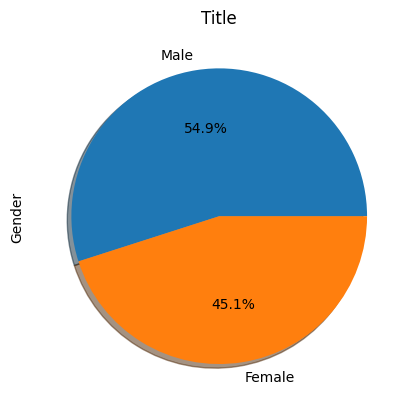

In [29]:
df=data_cleaned['Gender'].value_counts()
plot=df.plot.pie(y='hours', title="Title", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

<AxesSubplot: >

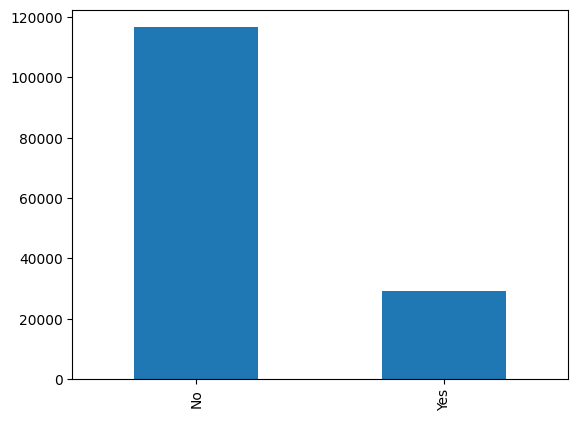

In [30]:
data_cleaned['Smoking'].value_counts().plot(kind='bar')

<AxesSubplot: >

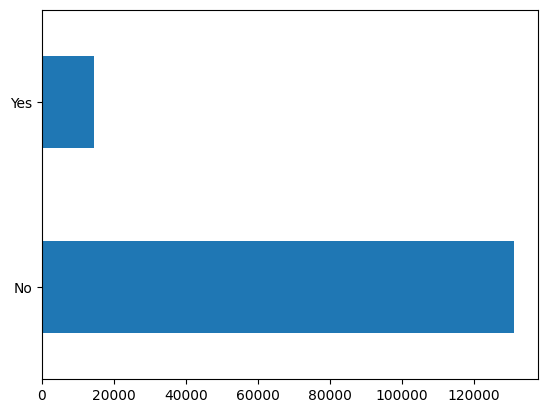

In [31]:
data_cleaned['Diabetes'].value_counts().plot(kind='barh')

il est nécessaire que les données soient equilibrées

C:\Users\hatem\AppData\Local\Temp\ipykernel_2688\1448807052.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


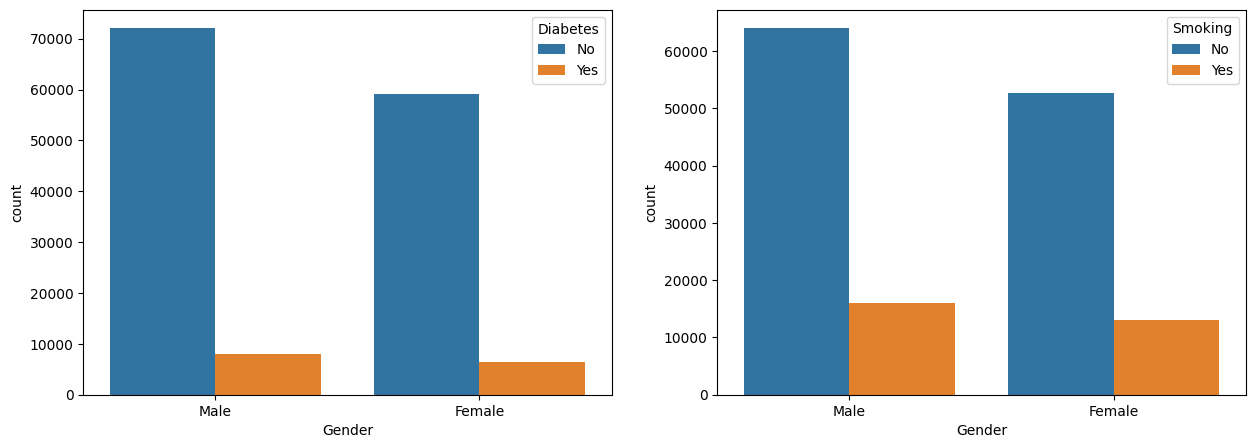

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='Gender', hue='Diabetes', data=data_cleaned, ax=ax[0])
sns.countplot(x='Gender', hue='Smoking', data=data_cleaned, ax=ax[1])
fig.show()

C:\Users\hatem\AppData\Local\Temp\ipykernel_2688\3560561497.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


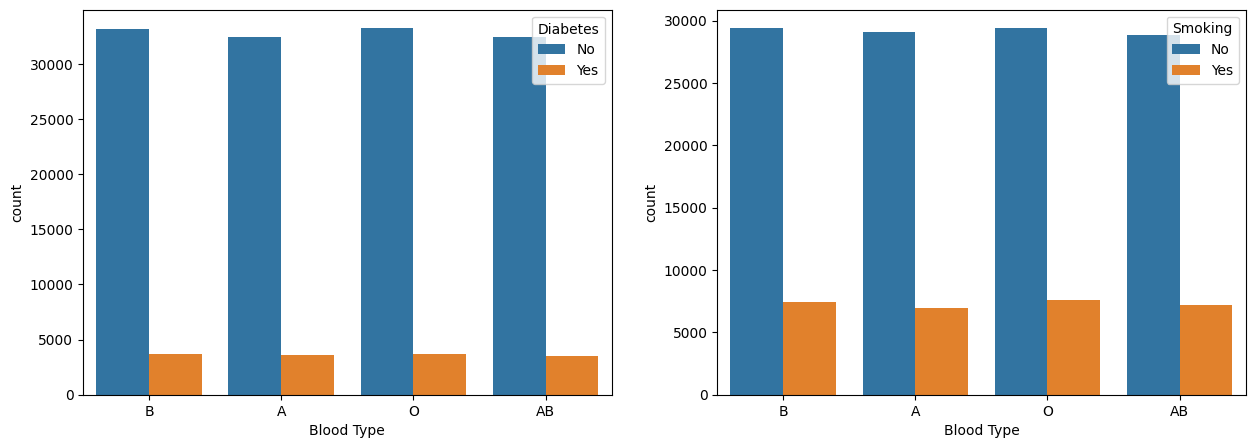

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='Blood Type', hue='Diabetes', data=data_cleaned, ax=ax[0])
sns.countplot(x='Blood Type', hue='Smoking', data=data_cleaned, ax=ax[1])
fig.show()

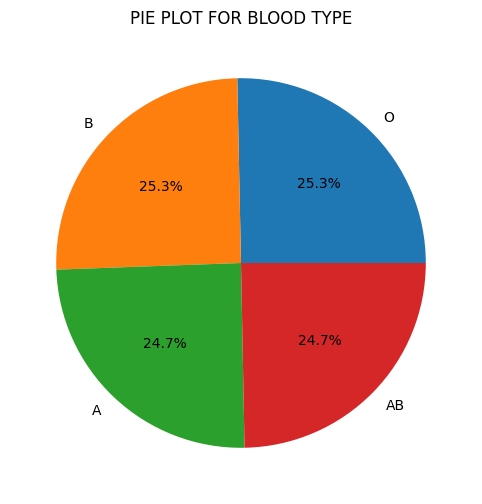

In [34]:
#pie plot for bloodtype
plt.figure(figsize=(8,6))
count = data_cleaned['Blood Type'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('PIE PLOT FOR BLOOD TYPE')
plt.xticks(rotation=90)
plt.show()

les variables numériques

In [35]:
numeric_columns = data_cleaned.select_dtypes(include=[int, float]).columns


<AxesSubplot: >

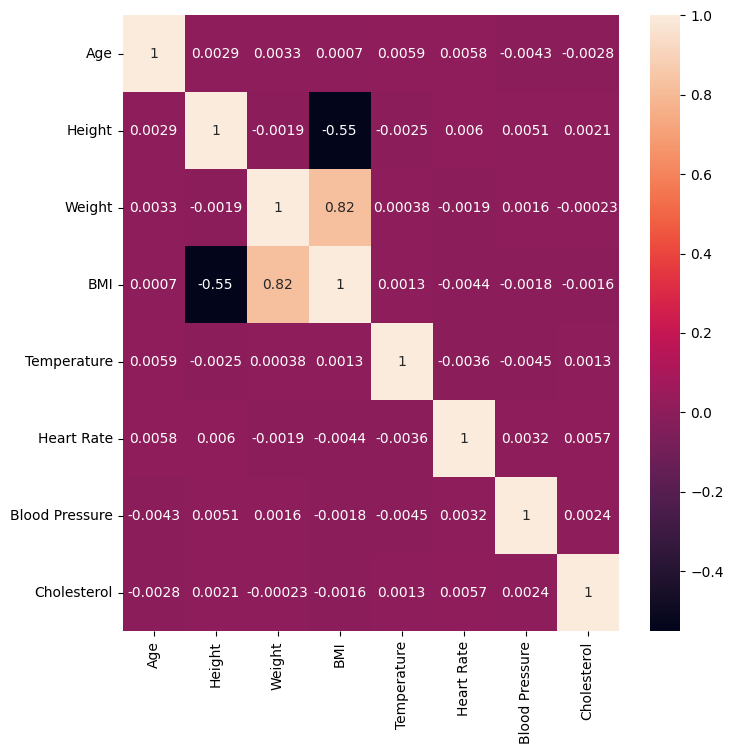

In [36]:
fig,ax = plt.subplots(figsize= (8,8))
sns.heatmap(data_cleaned.select_dtypes(include=[int, float]).corr(), annot=True)

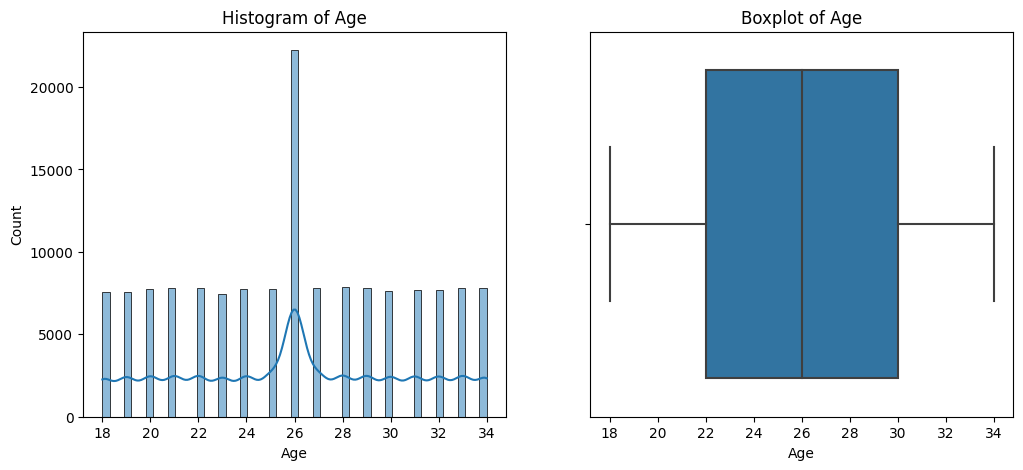

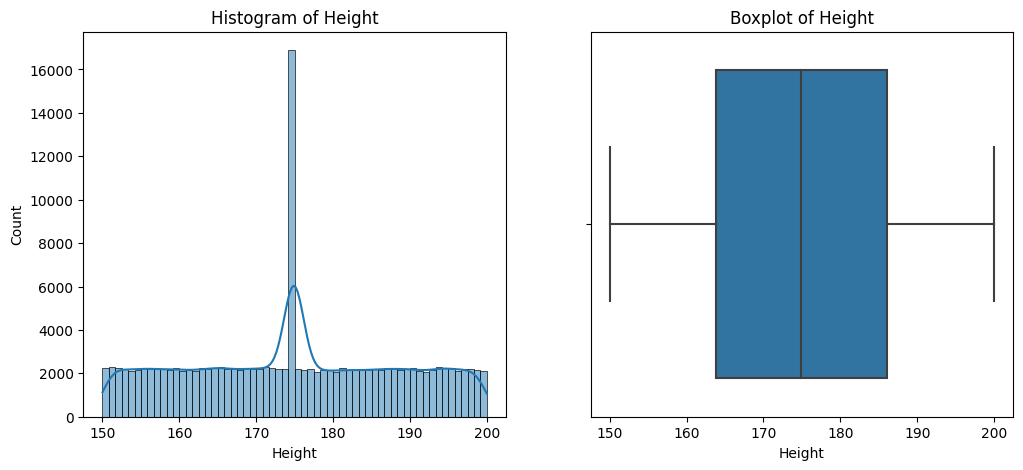

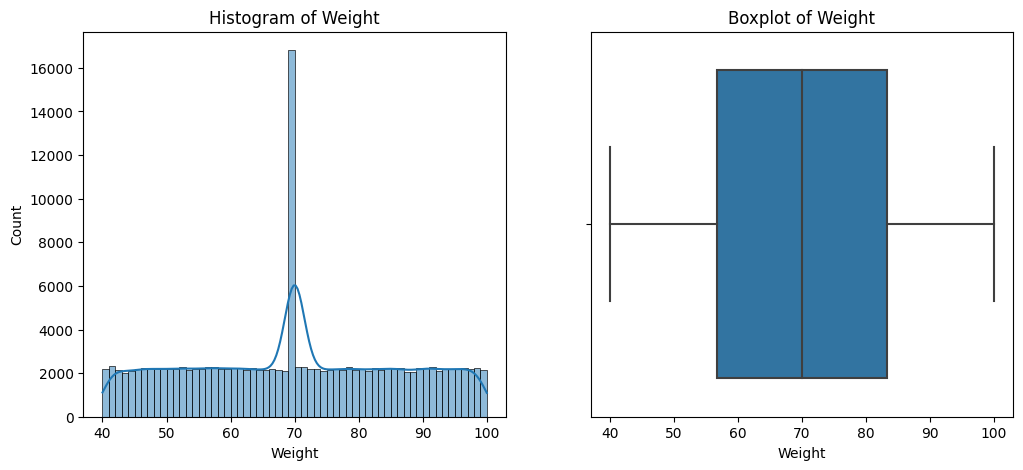

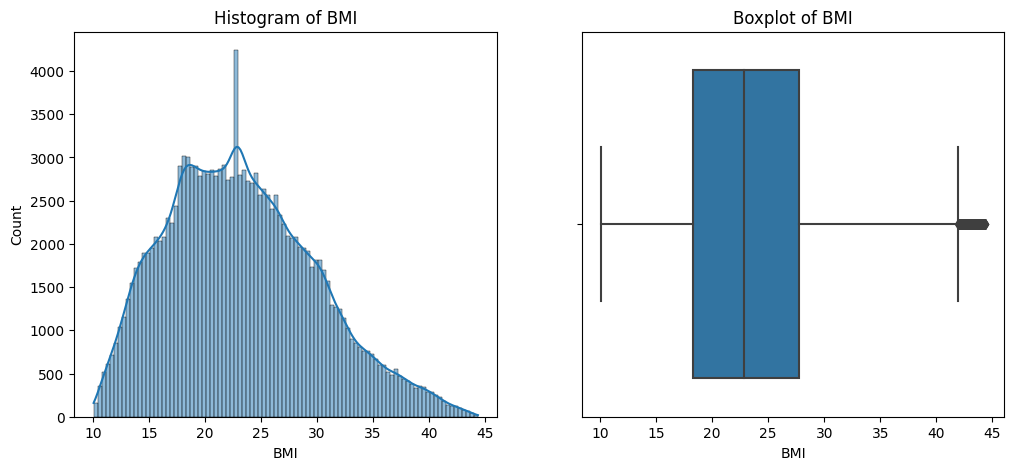

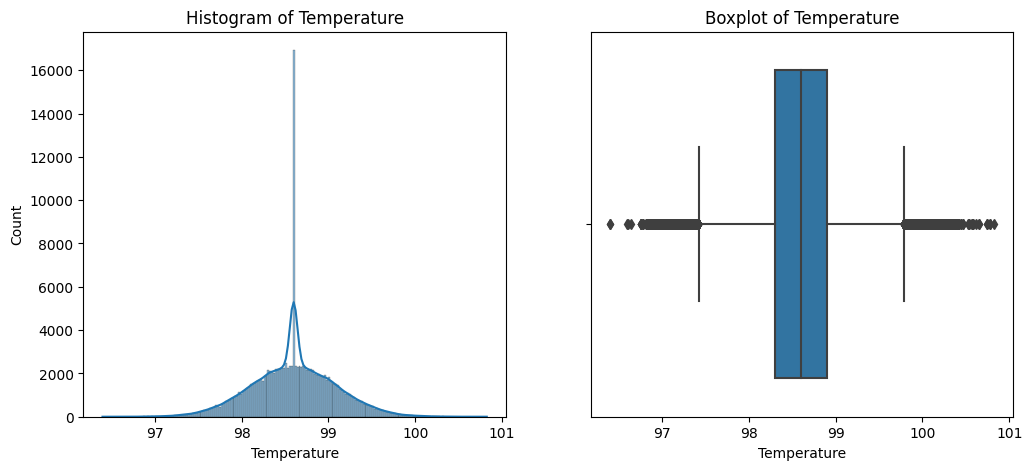

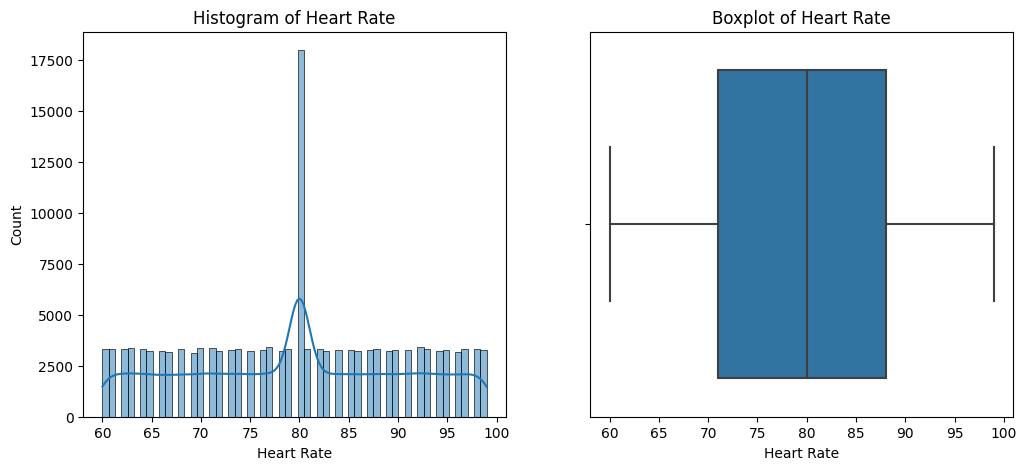

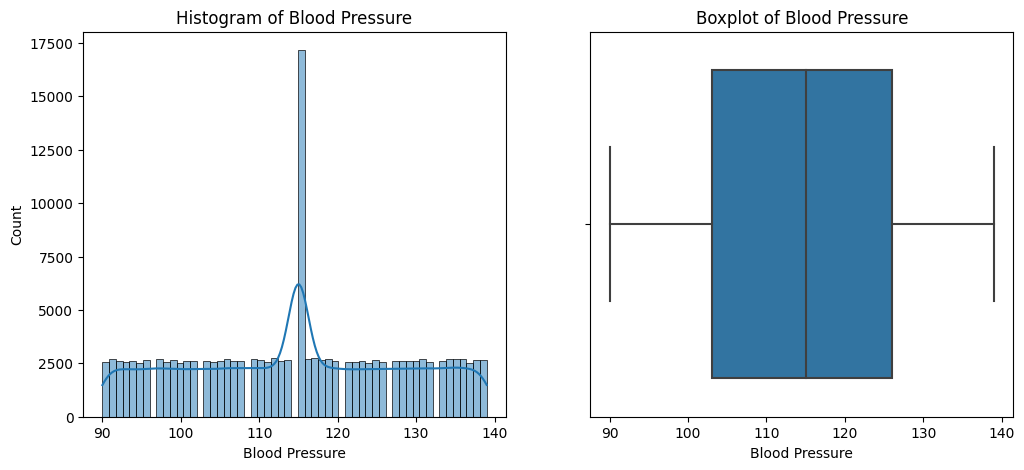

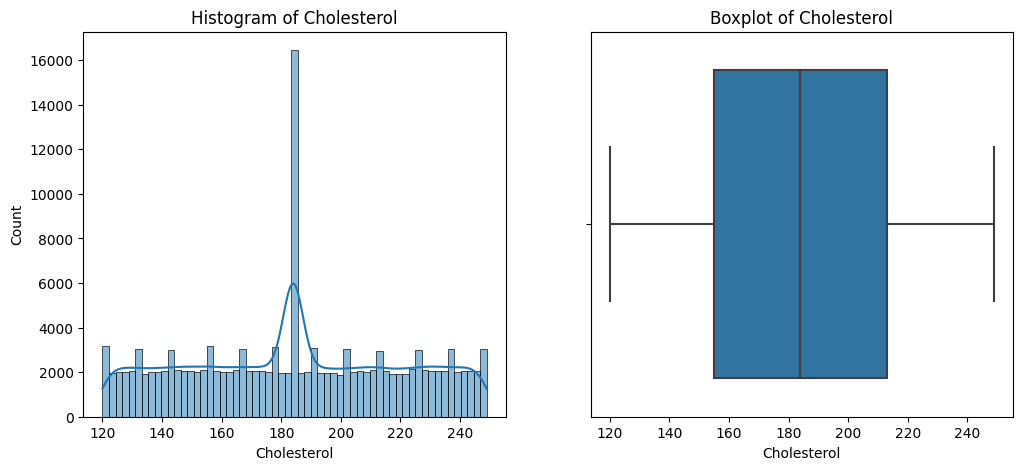

In [37]:
for col in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot histogram
    sns.histplot(data_cleaned, x=col, kde=True, ax=axes[0])
    axes[0].set_title('Histogram of ' + col)

    # Plot boxplot
    sns.boxplot(x=data_cleaned[col], ax=axes[1])
    axes[1].set_title('Boxplot of ' + col)

    plt.show()

In [38]:
for col in ['BMI', 'Temperature']:  
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    outliers = data_cleaned[(data_cleaned[col] < Q1 - whisker_width*IQR) | (data_cleaned[col] > Q3 + whisker_width*IQR)]
    
outliers.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
42,27.0,Female,156.960231,52.140209,AB,21.163793,99.845762,73.0,129.0,127.0,No,No
123,33.0,Male,157.550437,43.651255,A,17.585613,99.877598,88.0,124.0,171.0,No,No
170,34.0,Male,181.318225,46.059753,O,14.010018,97.314929,76.0,120.0,187.0,No,No
221,19.0,Male,159.891824,79.535598,AB,31.110647,97.355264,86.0,134.0,156.0,No,No
279,29.0,Female,174.009869,53.769234,O,17.757674,99.939372,80.0,99.0,154.0,No,No


In [39]:

Q1 = data_cleaned['BMI'].quantile(0.25)
Q3 = data_cleaned['BMI'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_cleaned['BMI']=np.where(data_cleaned['BMI']>upper_whisker,upper_whisker,
                       np.where(data_cleaned['BMI']<lower_whisker,lower_whisker,
                                data_cleaned['BMI']))


<AxesSubplot: xlabel='BMI'>

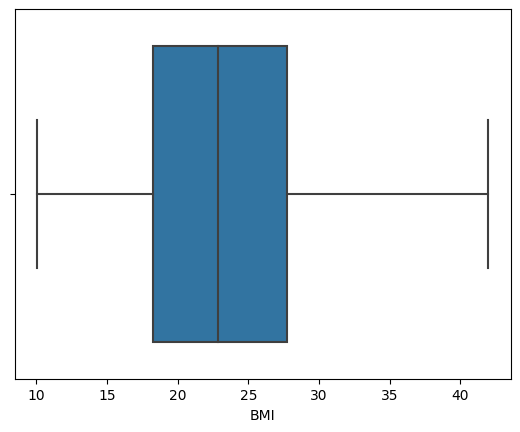

In [40]:
sns.boxplot(x=data_cleaned['BMI'])

In [41]:
Q1 = data_cleaned['Temperature'].quantile(0.25)
Q3 = data_cleaned['Temperature'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_cleaned['Temperature']=np.where(data_cleaned['Temperature']>upper_whisker,upper_whisker,
                       np.where(data_cleaned['Temperature']<lower_whisker,lower_whisker,
                                data_cleaned['Temperature']))

<AxesSubplot: xlabel='Temperature'>

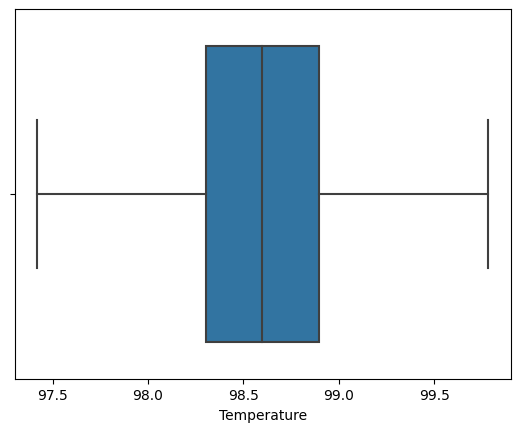

In [42]:
sns.boxplot(x=data_cleaned['Temperature'])

In [43]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145832 entries, 1 to 199998
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             145832 non-null  float64
 1   Gender          145832 non-null  object 
 2   Height          145832 non-null  float64
 3   Weight          145832 non-null  float64
 4   Blood Type      145832 non-null  object 
 5   BMI             145832 non-null  float64
 6   Temperature     145832 non-null  float64
 7   Heart Rate      145832 non-null  float64
 8   Blood Pressure  145832 non-null  float64
 9   Cholesterol     145832 non-null  float64
 10  Diabetes        145832 non-null  object 
 11  Smoking         145832 non-null  object 
dtypes: float64(8), object(4)
memory usage: 14.5+ MB


data preprocessing

In [44]:
data_pro=data_cleaned.copy()


In [45]:
data_pro['Gender']=data_pro['Gender'].map({'Male':1,'Female':0})

In [46]:
data_pro

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,26.0,1,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,32.0,0,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,1,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,0,174.899914,46.234173,O,15.114156,98.480008,95.0,115.0,231.0,No,No
6,21.0,1,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
199991,28.0,1,183.499177,69.979384,A,20.782695,97.420736,70.0,113.0,140.0,No,No
199992,34.0,1,161.590030,90.877589,B,34.803881,98.728836,70.0,96.0,208.0,No,No
199993,22.0,1,174.899914,46.155224,A,15.088347,98.331019,93.0,100.0,184.0,Yes,No
199995,24.0,1,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No


In [47]:
data_pro['Diabetes']=data_pro['Diabetes'].map({'No':1,'Yes':0})


In [48]:
data_pro['Smoking']=data_pro['Smoking'].map({'No':1,'Yes':0})

In [49]:
data_pro

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,26.0,1,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,1,1
2,32.0,0,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,0,1
3,30.0,1,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,1,0
4,23.0,0,174.899914,46.234173,O,15.114156,98.480008,95.0,115.0,231.0,1,1
6,21.0,1,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
199991,28.0,1,183.499177,69.979384,A,20.782695,97.420736,70.0,113.0,140.0,1,1
199992,34.0,1,161.590030,90.877589,B,34.803881,98.728836,70.0,96.0,208.0,1,1
199993,22.0,1,174.899914,46.155224,A,15.088347,98.331019,93.0,100.0,184.0,0,1
199995,24.0,1,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,1,1


In [50]:
data_pro['Blood Type']=data_pro['Blood Type'].map({'A':0,'B':1,'O':2,'AB':3})

In [51]:
data_pro

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,26.0,1,152.069157,47.630941,1,20.597139,98.714977,93.0,104.0,163.0,1,1
2,32.0,0,182.537664,55.741083,0,16.729017,98.260293,76.0,130.0,216.0,0,1
3,30.0,1,182.112867,63.332207,1,19.096042,98.839605,99.0,112.0,141.0,1,0
4,23.0,0,174.899914,46.234173,2,15.114156,98.480008,95.0,115.0,231.0,1,1
6,21.0,1,172.949704,48.102744,3,16.081635,97.715469,66.0,134.0,247.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
199991,28.0,1,183.499177,69.979384,0,20.782695,97.420736,70.0,113.0,140.0,1,1
199992,34.0,1,161.590030,90.877589,1,34.803881,98.728836,70.0,96.0,208.0,1,1
199993,22.0,1,174.899914,46.155224,0,15.088347,98.331019,93.0,100.0,184.0,0,1
199995,24.0,1,176.503260,95.756997,1,30.737254,99.170685,65.0,121.0,130.0,1,1


In [52]:
data_pro.shape

(145832, 12)

In [53]:
import numpy as np

data_pro_1 = data_pro.sample(frac=0.9, random_state=42)
data_pro_2 = data_pro.drop(data_pro_1.index)

data_pro_1.to_csv('data1.csv', index=False)
data_pro_2.to_csv('data2.csv', index=False)

In [54]:
data_pro_1.shape

(131249, 12)

In [55]:
data_pro_1.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
90319,22.0,0,174.899914,69.979384,0,22.876571,97.987387,91.0,125.0,127.0,1,1
82311,26.0,1,184.917386,84.928715,3,24.836996,98.252387,71.0,133.0,228.0,1,0
158144,31.0,1,194.904978,69.274302,1,18.235862,98.599654,94.0,100.0,212.0,1,1
189859,26.0,1,170.592294,53.457002,2,18.369011,98.822864,75.0,113.0,234.0,1,1
172144,31.0,0,179.538738,77.071192,2,23.909789,98.232003,60.0,126.0,217.0,1,0


In [56]:
data_pro_2.shape

(14583, 12)

#   train_test_split

In [57]:
sampled_dff = pd.get_dummies(data_pro_1)

X = sampled_dff.drop('Diabetes', axis=1)
y = sampled_dff['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
X.dtypes

Age               float64
Gender              int64
Height            float64
Weight            float64
Blood Type          int64
BMI               float64
Temperature       float64
Heart Rate        float64
Blood Pressure    float64
Cholesterol       float64
Smoking             int64
dtype: object

#   SMOTE

In [58]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [59]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [60]:
import mlflow
version = "v1.0"
data_url = "data/DiabetesTrainnigData.csv"
import os
os.environ['MLFLOW_TRACKING_USERNAME'] = "hatemslimani2035"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "f497730cfadcd6d476b9089d797bda3a8abcaa02"
mlflow.set_tracking_uri('https://dagshub.com/hatemslimani2035/ML_OPS.mlflow')
mlflow.set_experiment("Diabetes-experiment")

<Experiment: artifact_location='mlflow-artifacts:/2e7421c40249477fa7d34f2fe322de4c', creation_time=1697703303756, experiment_id='1', last_update_time=1697703303756, lifecycle_stage='active', name='Diabetes-experiment', tags={}>

#   xgboost

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier
import mlflow
from sklearn.metrics import precision_recall_fscore_support as score
with mlflow.start_run(run_name='XGBClassifierDabetes'):
    mlflow.log_param("data_url", data_url)
    mlflow.log_param("data_version", version)
    mlflow.log_param("input_rows", data_pro_1.shape[0])
    mlflow.log_param("input_cols", data_pro_1.shape[1])
    xgb_classifier = XGBClassifier()
    xgb_classifier.fit(X_train, y_train)

    y_pred = xgb_classifier.predict(X_test)
    mlflow.set_tag(key="model", value="XGBClassifierDabetes")
    params = xgb_classifier.get_params()
    mlflow.log_params(params)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    mlflow.log_metric("Precision_test", precision)
    mlflow.log_metric("Recall_test", recall)
    mlflow.log_metric("F1_score_test", fscore)
    mlflow.sklearn.log_model(xgb_classifier, artifact_path="ML_models")
    print(f"Accuracy: {accuracy:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)

    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

c:\Users\hatem\anaconda3\envs\tenserflow\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Accuracy: 0.90
Confusion Matrix:
[[   12  2576]
 [   12 23650]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.00      0.01      2588
           1       0.90      1.00      0.95     23662

    accuracy                           0.90     26250
   macro avg       0.70      0.50      0.48     26250
weighted avg       0.86      0.90      0.86     26250



#   logestic regression + ridge

In [62]:
from sklearn.linear_model import LogisticRegression
with mlflow.start_run(run_name='LogisticRegressionRidgeDabetes'):
    mlflow.log_param("data_url", data_url)
    mlflow.log_param("data_version", version)
    mlflow.log_param("input_rows", data_pro_1.shape[0])
    mlflow.log_param("input_cols", data_pro_1.shape[1])
    model_ridge = LogisticRegression(penalty='l2', C=1.5)  


    model_ridge.fit(X_train_resampled, y_train_resampled)

    y_pred_ridge = model_ridge.predict(X_test)
    mlflow.set_tag(key="model", value="LogisticRegressionRidgeDabetes")
    params = model_ridge.get_params()
    mlflow.log_params(params)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    mlflow.log_metric("Precision_test", precision)
    mlflow.log_metric("Recall_test", recall)
    mlflow.log_metric("F1_score_test", fscore)
    mlflow.sklearn.log_model(model_ridge, artifact_path="ML_models")
    print(f"Accuracy: {accuracy:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred_ridge)
    print("Confusion Matrix:")
    print(confusion_mat)

    class_report = classification_report(y_test, y_pred_ridge)
    print("Classification Report:")
    print(class_report)

c:\Users\hatem\anaconda3\envs\tenserflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.90
Confusion Matrix:
[[ 1008  1580]
 [ 9436 14226]]
Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.39      0.15      2588
           1       0.90      0.60      0.72     23662

    accuracy                           0.58     26250
   macro avg       0.50      0.50      0.44     26250
weighted avg       0.82      0.58      0.67     26250



In [76]:
import mlflow
import os
os.environ['MLFLOW_TRACKING_USERNAME'] = "hatemslimani2035"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "f497730cfadcd6d476b9089d797bda3a8abcaa02"
def getBestDiabetesModel():
    # mlflow.set_experiment("Diabetes-experiment")
    # all_experiments = [exp.experiment_id for exp in mlflow.search_experiments()]
    df_mlflow = mlflow.search_runs(
        experiment_ids=[1], filter_string="metrics.Precision_test <1")
    run_id = df_mlflow.loc[df_mlflow['metrics.Precision_test'].idxmax()]['run_id']

    logged_model = f'runs:/{run_id}/ML_models'

    model = mlflow.pyfunc.load_model(logged_model)
    return model
# setup mlflow
# your mlfow tracking uri
mlflow.set_tracking_uri('https://dagshub.com/hatemslimani2035/ML_OPS.mlflow')
data = {
  "Age": 22.0,
  "Gender": 0,
  "Height": 174.899914,
  "Weight": 69.979384,
  "Blood Type": 0,
  "BMI": 22.876571,
  "Temperature": 97.987387,
  "Heart Rate": 91.0,
  "Blood Pressure": 125.0,
  "Cholesterol": 127.0,
  "Smoking": 1
}
df = pd.DataFrame(data, index=[0])
    # preprocessed_data = clean_data_json(df)
model=getBestDiabetesModel()
predictions = model.predict(df)
    # id=getBestDiabetesModel()
print("predictions", predictions)

predictions [0]


In [72]:
X.head(2)

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Smoking
90319,22.0,0,174.899914,69.979384,0,22.876571,97.987387,91.0,125.0,127.0,1
82311,26.0,1,184.917386,84.928715,3,24.836996,98.252387,71.0,133.0,228.0,0


#   randomforest

In [63]:
with mlflow.start_run(run_name='RandomForestClassifierDabetes'):
    mlflow.log_param("data_url", data_url)
    mlflow.log_param("data_version", version)
    mlflow.log_param("input_rows", data_pro_1.shape[0])
    mlflow.log_param("input_cols", data_pro_1.shape[1])
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train_resampled, y_train_resampled)

    y_pred = rf_classifier.predict(X_test)
    mlflow.set_tag(key="model", value="RandomForestClassifierDabetes")
    params = rf_classifier.get_params()
    mlflow.log_params(params)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    mlflow.log_metric("Precision_test", precision)
    mlflow.log_metric("Recall_test", recall)
    mlflow.log_metric("F1_score_test", fscore)
    mlflow.sklearn.log_model(rf_classifier, artifact_path="ML_models")
    print(f"Accuracy: {accuracy:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)

    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)


Accuracy: 0.88
Confusion Matrix:
[[  740  1848]
 [ 1379 22283]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.29      0.31      2588
           1       0.92      0.94      0.93     23662

    accuracy                           0.88     26250
   macro avg       0.64      0.61      0.62     26250
weighted avg       0.87      0.88      0.87     26250

